#### **Input maps for the CNN**

In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
%store -r map_labels
%store -r nside
%store -r fwhm

In [3]:
# Point source map
%store -r ps_map_Q
%store -r ps_map_U

In [4]:
# Noise map
%store -r noise_Q
%store -r noise_U

In [5]:
# Power spectrum of the simulated CMB map
%store -r cl_TT_simulated
%store -r cl_EE_simulated
%store -r cl_BB_simulated
%store -r cl_TE_simulated

In [6]:
# Create CMB maps from the cls
cmb_simulated_cls = [cl_TT_simulated, cl_EE_simulated, cl_BB_simulated, cl_TE_simulated]
cmb_simulated_maps = hp.synfast(cmb_simulated_cls, nside, pol=True, fwhm=fwhm, new=True) 
cmb_Q = cmb_simulated_maps[1]
cmb_U = cmb_simulated_maps[2]

In [7]:
# Data input map 
data_Q_map = cmb_Q + ps_map_Q + noise_Q
data_U_map = cmb_U + ps_map_U + noise_U
data_P_map = np.sqrt(data_Q_map**2 + data_U_map**2)

In [8]:
# Centers of patches for 3.63º x 3.63º (https://arxiv.org/abs/1909.04701)
df = pd.read_csv("lon_lat13deg2.txt", header=None, delim_whitespace=True, names=["lon", "lat"]) 
coords = np.array(df)
lon = coords[:,0]
lat = coords[:,1]

In [9]:
%store lon
%store lat

Stored 'lon' (ndarray)
Stored 'lat' (ndarray)


In [10]:
# Map division with hp.gnomview 
reso = hp.nside2resol(nside, arcmin=True) # 2D map same pixel resolution as the 3D map of the sphere so that after the projection it is not very deformed
xsize = 64

In [11]:
%store xsize
%store reso

Stored 'xsize' (int)
Stored 'reso' (float64)


In [12]:
# For the map_labels
map_cut_labels = [hp.gnomview(map_labels, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [13]:
# For the data
map_cut_data_P = [hp.gnomview(data_P_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [14]:
map_cut_data_Q = [hp.gnomview(data_Q_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [15]:
map_cut_data_U = [hp.gnomview(data_U_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [16]:
map_cut_labels = np.array(map_cut_labels)

In [17]:
def reshape(array):
    N = len(array)
    return np.reshape(array, (N, xsize, xsize, 1))

In [18]:
map_cut_labels = reshape(map_cut_labels)

In [19]:
# Convert to array to then reshape
map_cut_labels = np.array(map_cut_labels)
map_cut_data_P = np.array(map_cut_data_P)
map_cut_data_Q = np.array(map_cut_data_Q)
map_cut_data_U = np.array(map_cut_data_U)

In [20]:
# Reshape data and labels
def reshape(array):
    N = len(array)
    return np.reshape(array, (N, xsize, xsize, 1))
map_cut_data_P = reshape(map_cut_data_P)
map_cut_data_Q = reshape(map_cut_data_Q)
map_cut_data_U = reshape(map_cut_data_U)
map_cut_labels = reshape(map_cut_labels)

In [21]:
map_cut_data_QU = np.concatenate((map_cut_data_Q, map_cut_data_U), axis = -1)

In [22]:
# Split data into 2 parts: 20% for validation (test_size), 80% for training
data_train_P, data_val_P = train_test_split(map_cut_data_P, test_size=0.2, random_state=42)
data_train_QU, data_val_QU = train_test_split(map_cut_data_QU, test_size=0.2, random_state=42)
label_train, label_val = train_test_split(map_cut_labels, test_size=0.2, random_state=42)

In [23]:
%store data_train_P
%store data_val_P
%store data_train_QU
%store data_val_QU
%store label_train
%store label_val

Stored 'data_train_P' (ndarray)
Stored 'data_val_P' (ndarray)
Stored 'data_train_QU' (ndarray)
Stored 'data_val_QU' (ndarray)
Stored 'label_train' (ndarray)
Stored 'label_val' (ndarray)


In [24]:
%store map_cut_labels

Stored 'map_cut_labels' (ndarray)


In [25]:
%store map_cut_data_P

Stored 'map_cut_data_P' (ndarray)


#### **EB**

In [26]:
cmb_E = hp.synfast(cl_EE_simulated, nside = nside, pol = False, fwhm = fwhm)
cmb_B = hp.synfast(cl_BB_simulated, nside = nside, pol = False, fwhm = fwhm)

In [27]:
# Point sources:
%store -r E
%store -r B

In [28]:
%store -r cl_noise_EE_simulated
%store -r cl_noise_BB_simulated

In [29]:
noise_E = hp.synfast(cl_noise_EE_simulated, nside = nside, pol = False, fwhm = fwhm)
noise_B = hp.synfast(cl_noise_BB_simulated, nside = nside, pol = False, fwhm = fwhm)

In [30]:
data_E_map = cmb_E + E + noise_E
data_B_map = cmb_B + B + noise_B

In [31]:
map_cut_data_E = [hp.gnomview(data_E_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [32]:
map_cut_data_B = [hp.gnomview(data_B_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [33]:
map_cut_data_E = np.array(map_cut_data_E)
map_cut_data_B = np.array(map_cut_data_B)

In [34]:
map_cut_data_E = reshape(map_cut_data_E)
map_cut_data_B = reshape(map_cut_data_B)

In [35]:
map_cut_data_EB = np.concatenate((map_cut_data_E, map_cut_data_B), axis = -1)

In [36]:
# Split data into 2 parts: 20% for validation (test_size), 80% for training
data_train_EB, data_val_EB = train_test_split(map_cut_data_EB, test_size=0.2, random_state=42)

In [37]:
%store data_train_EB
%store data_val_EB

Stored 'data_train_EB' (ndarray)
Stored 'data_val_EB' (ndarray)


In [38]:
# For E:
data_train_E, data_val_E = train_test_split(map_cut_data_E, test_size=0.2, random_state=42)

In [39]:
# For B:
data_train_B, data_val_B = train_test_split(map_cut_data_B, test_size=0.2, random_state=42)

In [40]:
%store data_train_E
%store data_val_E

Stored 'data_train_E' (ndarray)
Stored 'data_val_E' (ndarray)


In [41]:
%store data_train_B
%store data_val_B

Stored 'data_train_B' (ndarray)
Stored 'data_val_B' (ndarray)


#### **Label vs map visualisation**

/tmp/ipykernel_841210/644330280.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


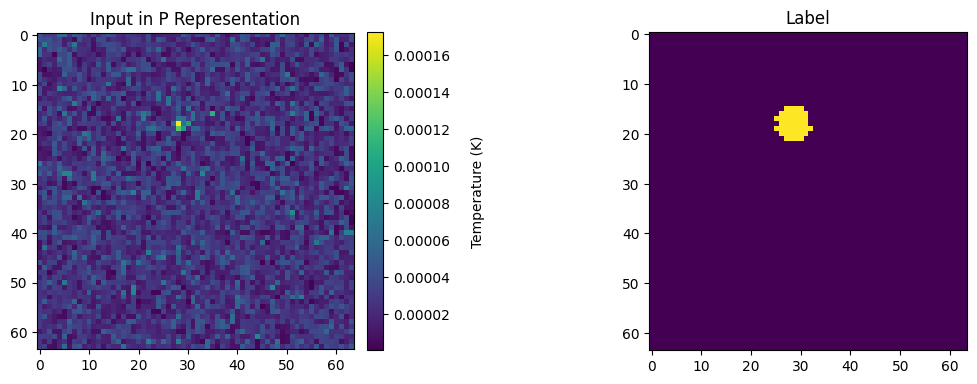

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 0.92], 'wspace': 0.8})
cmap = 'viridis'

im1 = axs[0].imshow(map_cut_data_P[67], cmap=cmap, aspect='equal') # representative patch
axs[0].set_title('Input in P Representation')

cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
cbar1.set_label('Temperature (K)', labelpad=15)  

im2 = axs[1].imshow(map_cut_labels[67], cmap=cmap, aspect='equal')
axs[1].set_title('Label')

plt.tight_layout()

fig.savefig('labelvsmap.png', dpi=100)  


plt.show()


#### **Number of labels per patch histogram**

In [43]:
from skimage.measure import label, regionprops

label_counts = {
    '0 labels': 0,
    '1 label': 0,
    '2 labels': 0,
    '3 labels': 0,
    '4 or more labels': 0
}

for patch_labels in map_cut_labels:
    labeled_image = label(patch_labels.squeeze(), connectivity=2, return_num=True)  # Label connected components
    num_labels = labeled_image[1]

    if num_labels == 0:
        label_counts['0 labels'] += 1
    elif num_labels == 1:
        label_counts['1 label'] += 1
    elif num_labels == 2:
        label_counts['2 labels'] += 1
    elif num_labels == 3:
        label_counts['3 labels'] += 1
    else:
        label_counts['4 or more labels'] += 1

for label_type, count in label_counts.items():
    print(f"Number of patches with {label_type}: {count}")


Number of patches with 0 labels: 778
Number of patches with 1 label: 1102
Number of patches with 2 labels: 808
Number of patches with 3 labels: 347
Number of patches with 4 or more labels: 151


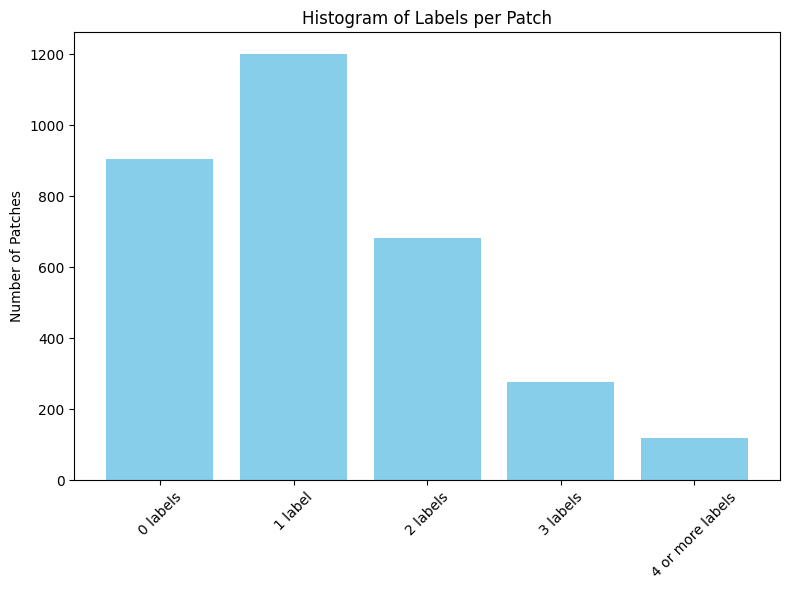

In [44]:
labels = ['0 labels', '1 label', '2 labels', '3 labels', '4 or more labels']
counts = [906, 1201, 683, 276, 120]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue')
plt.ylabel('Number of Patches')
plt.title('Histogram of Labels per Patch')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.savefig("labelsperpatch.jpg")
plt.show()
